Model Selection and Boosting 
Case Study -2 (CS 44)
Case Study


Objectives:


•	Learn to use Cross validation to pick the best models.


Questions:



1.	Load the data from “glass.csv” and make a bar plot of different types of glasses.


In [2]:
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import  confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import  confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
os.chdir('D:\\top mentor assignment\\Batch 98 Day 57\\ML Case Studies with Answer\\CS 44 Ans - Model Selection and Boosting-2\\')

In [4]:
os.getcwd()

'D:\\top mentor assignment\\Batch 98 Day 57\\ML Case Studies with Answer\\CS 44 Ans - Model Selection and Boosting-2'

In [5]:
df = pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
df['Type'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], dtype=int64)

In [8]:
types = df["Type"].values
print(np.unique(types))

[1 2 3 5 6 7]


<Axes: xlabel='Type'>

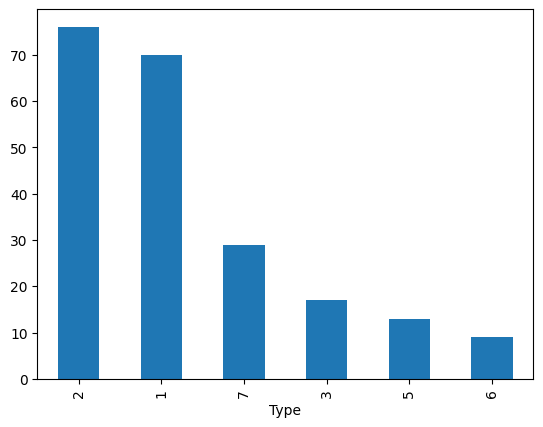

In [9]:
fig, ax = plot.subplots()
df['Type'].value_counts().plot(ax=ax, kind='bar')

In [13]:
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values
print (X)

[[ 1.52101 13.64     4.49    ...  8.75     0.       0.     ]
 [ 1.51761 13.89     3.6     ...  7.83     0.       0.     ]
 [ 1.51618 13.53     3.55    ...  7.78     0.       0.     ]
 ...
 [ 1.52065 14.36     0.      ...  8.44     1.64     0.     ]
 [ 1.51651 14.38     0.      ...  8.48     1.57     0.     ]
 [ 1.51711 14.23     0.      ...  8.62     1.67     0.     ]]


In [14]:
print (y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]


In [15]:
gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)
print (y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)

(171, 9)


In [17]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
y_predict = clf.predict(X_test)

In [19]:
accuracy = accuracy_score(y_predict,y_test)
print(accuracy)

0.7441860465116279


In [20]:
print(confusion_matrix(y_predict,y_test)) 

[[14  1  1  0  0  0]
 [ 4  9  2  0  0  0]
 [ 1  0  3  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  1  0  0  1  0]
 [ 0  0  0  0  0  4]]


In [21]:
k_fold = KFold(3)
print(X_train.shape,y_train.shape)

(171, 9) (171,)


In [22]:
models =[]
for k in enumerate(k_fold.split(X_train, y_train)):
    clf.fit(X_train,y_train)
    print(clf.score(X_test,y_test))
    models.append(clf)

0.7441860465116279
0.7441860465116279
0.6976744186046512


In [24]:
y_predict = clf.predict(X_test)
print ( accuracy_score(y_predict,y_test))

0.6976744186046512


In [25]:
print(confusion_matrix(y_predict,y_test))

[[14  2  1  0  0  0]
 [ 3  7  2  0  0  0]
 [ 1  0  3  0  0  0]
 [ 0  2  0  1  0  0]
 [ 0  1  0  0  1  0]
 [ 1  0  0  0  0  4]]


In [26]:
n_estimators_range = [1,2,4,8,16,32]
grid_cv= GridSearchCV(RandomForestClassifier(),param_grid=dict(n_estimators=n_estimators_range),cv=KFold(10))
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 4, 8, 16, 32]})

In [27]:
grid_cv.best_score_

0.800326797385621

In [28]:
grid_cv.best_estimator_

RandomForestClassifier(n_estimators=32)

In [29]:
y_predict = grid_cv.predict(X_test)
print ( accuracy_score(y_predict,y_test))

0.813953488372093


In [30]:
conf_mat = confusion_matrix(y_predict,y_test)
print(conf_mat)

[[17  1  3  0  0  0]
 [ 1 10  1  0  0  0]
 [ 1  0  2  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  1  0]
 [ 0  1  0  0  0  4]]
